### **Scenario**

Sailfort Motors are currently having a high rate of turnover. Since Sailfort Motors invest in recruiting, training, and upskilling their employees, the impact of high turnover rate is costly in the financial sense. The HR department were tasked by the leadership team of Sailfort Motors to collect sample data from the employees on what might be the cause of high turnovers. The leadership also tasked you to analyze the survey data and design a model to predict employee departure.

_Note: Turnover data includes both employees who choose to quit their job and employees who are let go._

The task also involves identifying the factors that contribute to employee departure. The model will be beneficial to the company by increasing retention rate and job satisfaction of employees.

- **Issue/Problem**
  - Sailfort Motors seeks to improve employee retention.
- **Response**
  - Since the variable to be predicted is **_categorical_**, a logistic regression or tree-based machine learning model will be used.
- **Impact**
  - The model will help predict employee departure and the factors that causes it. The HR can also devise a plan to prevent departures and improve employee retention.

### **Familiarization of the HR Dataset**

The dataset was provided by Google Certificates, but can also be downloaded in [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv). The dataset contains 14,999 rows and 10 columns. Shown below are the variables used in the dataset and its corresponding description.
Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### **Import the necessary packages**

In [295]:
## For data manipulation
import numpy as np
import pandas as pd

## For data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## For displaying all columns in the dataframe
pd.set_option('display.max_columns',None)

## For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

# Miscellaneous
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

### **Load Dataset**

In [296]:
df0 = pd.read_csv("D:\Documents\Google Advanced Data Analytics Professional Certificate\Sailfort Motors Capstone\HR_comma_sep.csv")

In [297]:
## Display the first 10 rows of data
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### **Data Exploration**

#### **Basic Information about the Data**

In [298]:
## Basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Based on the basic information about the data, there are **`14,999`** non-null objects for all columns, equal to the total number of rows, which means that there are **no null** values in the dataset. The corresponding datatype for each columns are also shown.

#### **Descriptive Statistics about the Data**

In [299]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### **Rename Columns**
Standardize column names into `snake_case` ,rename misspelled column names, and simplify column names.
The following columns will be renamed:
- average_montly_hours
- Work_accident
- time_spend_company
- Department

In [300]:
## Rename columns
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

## Check if columns are renamed
df0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


By checking, the column names are standardized, concise, and free from misspelled words.

#### **Check Duplicate Data**

In [301]:
## Check data for duplicates
print(df0.duplicated().sum())

3008


In [302]:
## Inspect rows containing duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The dataset contains 3008 duplicated entries. Upon inspecting the rows containing duplicates, it is unlikely that two employees reporting the same responses for every columns. However, dropping these duplicates could cause imbalance to the dataset, so we'll check the number of duplicated entries for each values of the target variable `left`.

In [303]:
## Create a dataset containing duplicated data
df_duplicates = df0[df0.duplicated()==True]

##Check the number of duplicated values for each value of the target variable
print(df_duplicates['left'].value_counts())

left
1    1580
0    1428
Name: count, dtype: int64


Both of the values for the target variable `left` have duplicated entries. However, the legitimacy of duplicated entries is questionable and might affect results of the analysis, therefore we will proceed by dropping them.

In [304]:
#Drop duplicated rows and save it to a new dataframe
df1 = df0.drop_duplicates(keep = 'first')

df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [305]:
print(df1.shape)

(11991, 10)


The dataset is left with **11,991** rows.

#### **Check Dataset for Outliers**

The `tenure` column have a max value of more than 2.5x standard deviation. Using a boxplot, we will confirm the outliers.

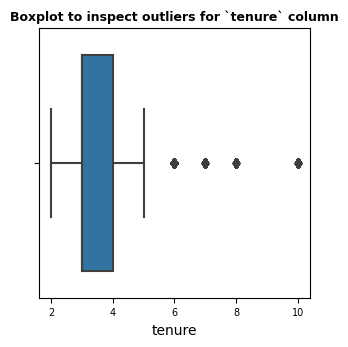

In [306]:
plt.figure(figsize=(3.5,3.5))
plt.title('Boxplot to inspect outliers for `tenure` column',fontweight='bold',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot confirms the presence of outliers in the `tenure` column. We will now investigate the number of rows that contain outliers in the `tenure` column.

In [307]:
# 25th percentile value for the 'tenure' column
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile value for the 'tenure' column
percentile75 = df1['tenure'].quantile(0.75)

# Interquartile range in 'tenure' column
iqr = percentile75 - percentile25

# Upper and lower limit for non-outlier values in 'tenure' column
upper_limit = percentile75 + (1.5*iqr)
print('Upper Limit:',upper_limit)
lower_limit = percentile25 - (1.5*iqr)
print('Lower Limit:',lower_limit)

# Subset of data containing outliers in 'tenure' column
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print('Number of rows containing outliers in `tenure` column:', len(outliers))


Upper Limit: 5.5
Lower Limit: 1.5
Number of rows containing outliers in `tenure` column: 824


There are **824** rows containing outliers in the `tenure` column. However, since we will be using tree-based model, which is less sensitive to outliers, we will not remove the outliers.

##### **Determine the percentage of employees left to the total number of employees.**

In [308]:
print(df1['left'].value_counts())
print()

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Based on the HR dataset that is free from duplicates, the percentage of employees left to the total number of employees is **16.60%**.

### **Data Visualization**

After data exploration, we will create different plots to investigate the relationship between variables in the HR dataset.

##### **a. Relationship between `average_monthly_hours` and `number_project`**

- For this relationship, we will use a box plots and stacked histogram. The boxplot is useful to visualizing the distribution of data, however it does not accurately display the distribution of the data. For the distribution of data, we will use a stacked histogram.

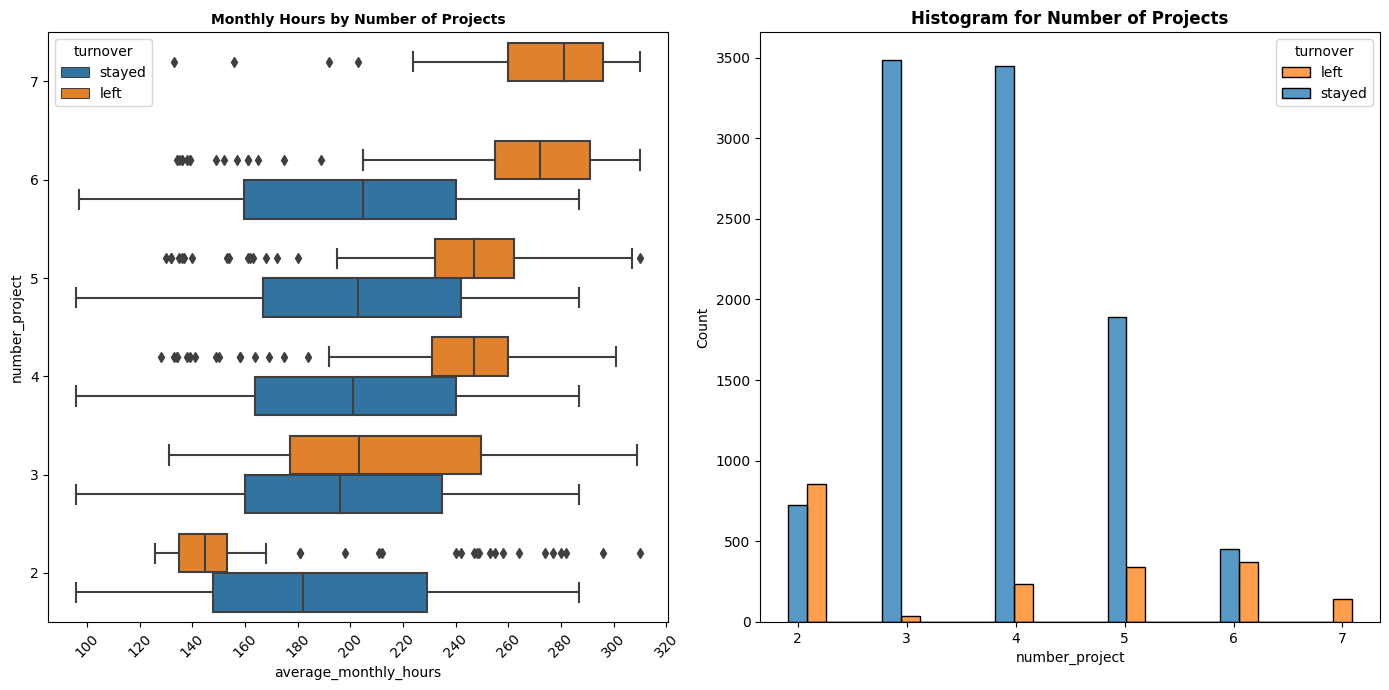

In [309]:
fig, ax = plt.subplots(1,2, figsize=(14,7))

## Create boxplot
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly Hours by Number of Projects", fontweight='bold', fontsize=10)
ax[0].set_xticks([100,120,140,160,180,200,220,240,260,280,300,320])
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=45, fontsize=10)
ax[0].legend(title='turnover')
legend_label = ['stayed','left']
n=0
for i in legend_label:
    ax[0].legend_.texts[n].set_text(i)
    n += 1

## Create histogram
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title("Histogram for Number of Projects", fontweight='bold')
ax[1].legend(title='turnover', labels=['left','stayed'])

plt.tight_layout()
plt.show()

The plot shows that the mean number of hours worked for employees who left and stayed increases as the number of project increases. This is expected, as those who worked with more projects tend to work longer hours. However, several things seems to be noticeable in the plots:


1. There is a noticeable difference in the mean work hours for employees who left versus employees who stayed. The mean number of work hours for employees who left is noticeably lower than those who stayed in the company, but worked on the same number of projects. These could be the employees who underperformed and fired by the company.

2. For employees who worked with four or more projects, it is also shown that employees who left the company worked more hours that employees who stayed. It also shows that all employees who worked for seven projects left the company. These employees contribute a lot to the company, but this could also be a sign of being overworked.

3. Assuming a 5-day work week, each day having 8 hours of work, and each employee having a 2-week vacation leave, the number of working hours for this setting is `(8 hours/day * 5 days/week * 50 weeks/year) / 12 months = 166.67 hours/month`. It seems like majority of employees who work for four or more projects also work more than 166.67 hours/month. It is also evident that majority of these employees left the company. Being overworked could play a major role here.

4. The ratio of employees who left/stayed who worked for 3 projects is very small. This could indicate that this is the optimal number of projects for employees.

##### **b. Relationship between `average_monthly_hours` and `satisfaction_level`**

- Both the average_monthly_hours and satisfaction_level contains quantitative data and continuous variables. For the relationship between the two, we will use scatterplot to clearly represent this relationship.

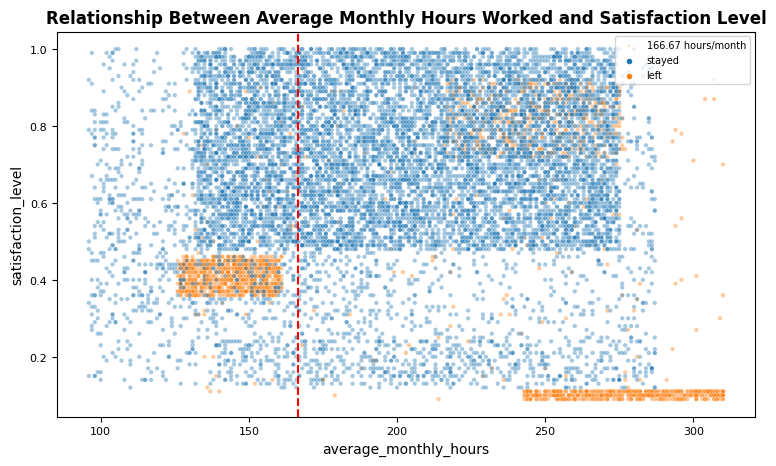

In [310]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4, s=10)
plt.axvline(x=166.67, color='red', linestyle='--')
plt.legend(labels=['166.67 hours/month', 'stayed','left'], loc='upper right', fontsize=7, markerscale=0.5)
plt.title('Relationship Between Average Monthly Hours Worked and Satisfaction Level', fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

From the scatterplot, it clearly that employees who worked for more than 166.67 hours/month returned satisfaction level that is close to 0. There are also a sizable group of employees who returned a satisfaction level of around 0.4 but still left the company. However, the distribution of points in the scatterplot seems to be concentrated on certain values, which could indicate possible data manipulation or synthetic data.

##### **c. Relationship between `tenure` and `satisfaction_level`**

- For this relationship, we will use boxplot and histogram.

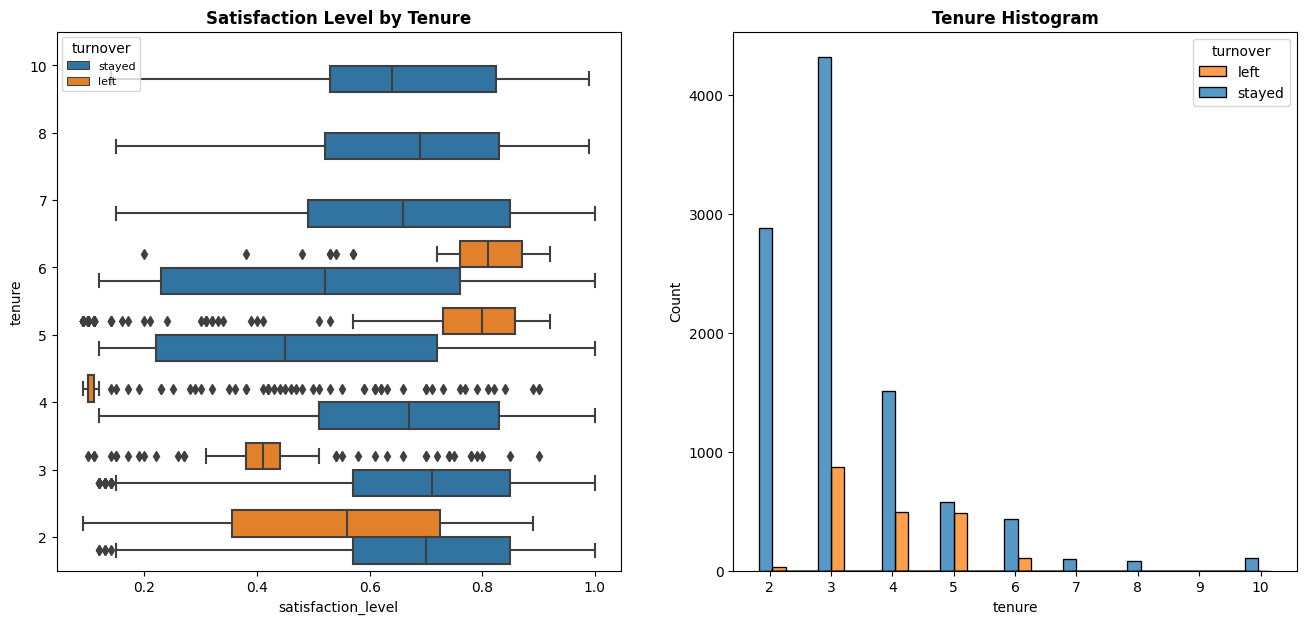

In [311]:
fig, ax = plt.subplots(1,2, figsize=(16,7))

# Create boxplot
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction Level by Tenure', fontweight='bold')
ax[0].legend(title='turnover', loc='upper left', fontsize=8)
legend_label = ['stayed','left']
n=0
for i in legend_label:
    ax[0].legend_.texts[n].set_text(i)
    n += 1

# Create histogram
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Histogram', fontweight='bold')
ax[1].legend(title='turnover', labels=['left','stayed'])
ax[1].set_xticks([2,3,4,5,6,7,8,9,10])

plt.show()

The following observations are obtained from the plots:
    
1. Employees with the longest tenures (more than 6 years) stayed.
2. Employees with the longest tenures also have high satisfaction levels for the company. The satisfaction levels from these employees also aligned to new employees and employees with shorter tenures.
3. Employees who left the company after 4 years of stay yield a very low satisfaction level.
4. Employees with medium-length tenures (5 to 6 years) gave high satisfaction rating but still left the company.
5. There are few longer-tenured employees. This could be employees who are high-ranking or higher-paid.

Next, we will calculate the mean and median satisfaction levels for employees who left and those who stayed.

In [312]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Employees who left the company gave a mean and median satisfaction level of **0.44** and **0.41**, respectively. These values are lower than the mean and median satisfaction level from employees who stayed in the company. Also, mean satisfaction score from employees who stayed is quite lower than the median, which could indicate that the satisfaction level for employees who stayed is skewed to the left.

#### **d. Salary Levels for Different Tenures**

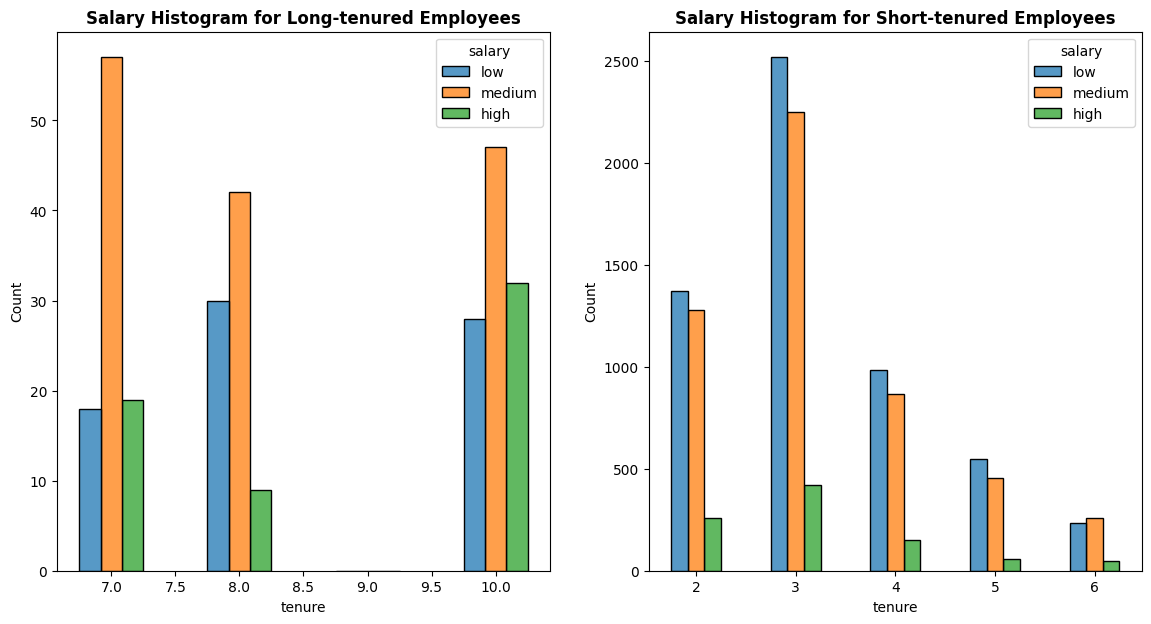

In [313]:
fig, ax = plt.subplots(1,2, figsize=(14,7))

## Define tenure classification
## Long-tenured employees (more than 6 years)
## Short-tenured employees (6 years and less)
tenure_long = df1[df1['tenure'] > 6]
tenure_short = df1[df1['tenure'] < 7]

## Plot Long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low','medium','high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary Histogram for Long-tenured Employees', fontweight='bold')

## Plot Short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low','medium','high'], multiple='dodge', shrink=0.5, ax=ax[1])
ax[1].set_title('Salary Histogram for Short-tenured Employees', fontweight='bold')

plt.show()


The plot above shows that majority of long-tenured employees have medium salaries, however there is a little discrepancy between the number of low, medium, and highly-paid long-tenured employees, unlike for short-tenured employees, which has a very large number of low and medium-paid employees compared to highly-paid employees.

#### **e. Relationship between `last_evaluation` and `average_monthly_hours`**

- We will create a scatterplot to determine if there is a correlation between working long hours and receiving high evaluation points.

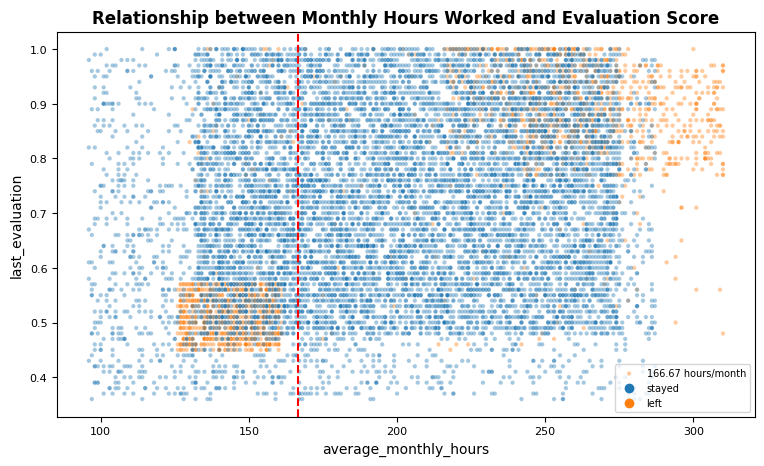

In [314]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4, s=10)
plt.axvline(x=166.67, color='red', linestyle='--')
plt.legend(labels=['166.67 hours/month','stayed','left'], fontsize=7)
plt.title('Relationship between Monthly Hours Worked and Evaluation Score', fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

The relationship yields the following observations:

1. There are two types of employees who left the company. The first group are employees who worked more than the monthly average of 166.67 hours and received high evaluation scores, these could indicate employees with high productivity but overworked. The second group are employees who worked less than the monthly average and received low evaluation scores.
2. It seems like a noticeable amount of employees in the far upper right quadrant worked the longest hours and left the company, despite having high evaluation scores.
3. There seems to be a correlation between the number of hours worked and evaluation scores.
4. Despite having a correlation, working more than the monthly average does not guarantee high evaluation scores.
5. Based on the distribution of points in the scatterplot, most of the employees worked more than the monthly average of 166.67 hours/month.

#### **f. Relationship between `average_monthly_hours` and `promotion_last_5years`**

- Inspect whether employees who worked more than the monthly average were promoted in the last 5 years.

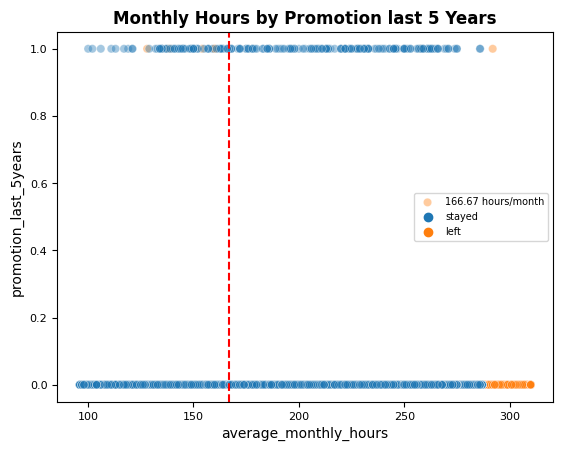

In [315]:
figsize=(7,7)

sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', linestyle='--')
plt.title('Monthly Hours by Promotion last 5 Years', fontweight='bold')
plt.legend(labels=['166.67 hours/month','stayed','left'], fontsize=7)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

The plot above shows the following observations:

1. There are very few employees who worked more than the monthly average were promoted.
2. The employees who worked the longest hours, and left the company, were not promoted in the last 5 years.
3. Majority of employees who left worked far more than the monthly average.

#### **g. Distribution of Employees between Departments**

Inspect the distribution of employees between departments:

In [316]:
print(df1['department'].value_counts())

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64


Plot a histogram to compare the distribution of employees of left and stayed for each department.

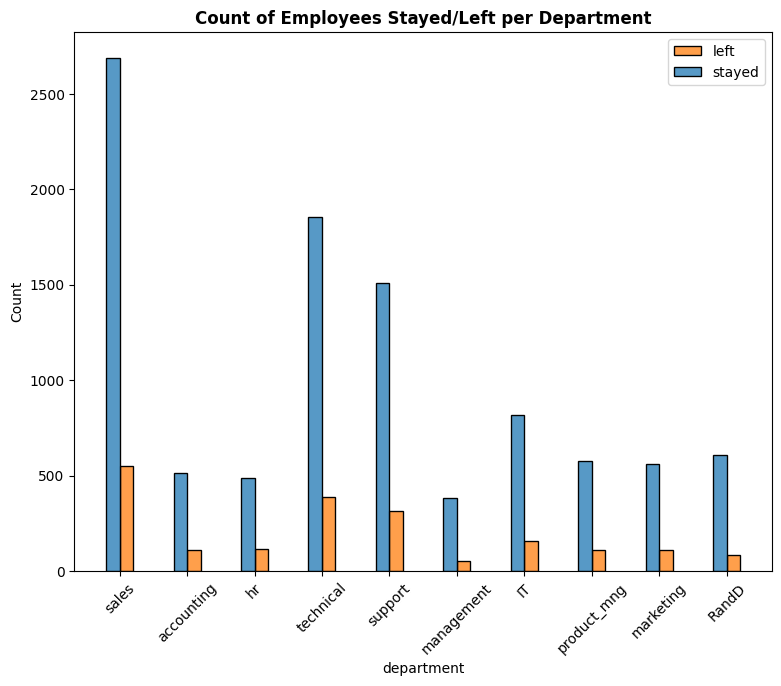

In [317]:
plt.subplots(figsize=(9,7))

sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.4)
plt.legend(labels=['left','stayed'])
plt.xticks(rotation=45, fontsize=10)
plt.title('Count of Employees Stayed/Left per Department', fontweight='bold')

plt.show()

Based on the histogram above, all departments have a higher number of employees who stayed versus employees who left.

#### **h. Correlations between Variables in the Data**

To clearly visualize the relationship between each variables in the dataset, we will use a heatmap.

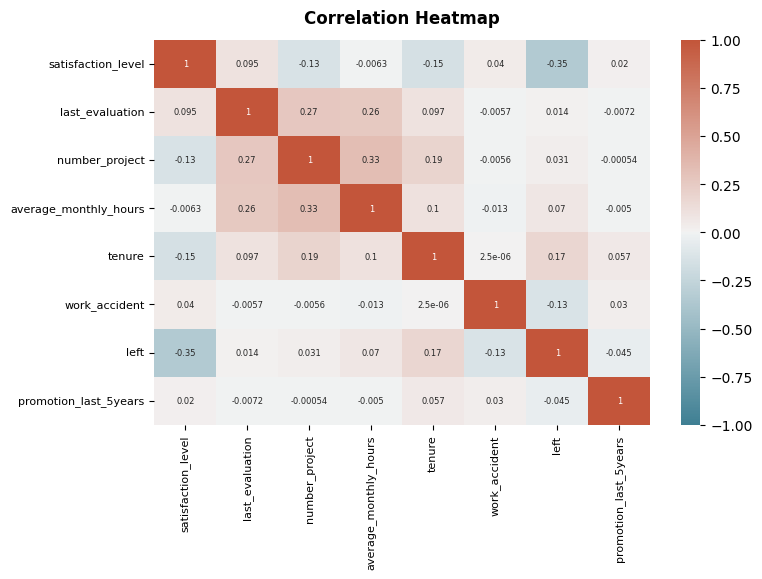

In [318]:
heatmap_corr=df1[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure','work_accident','left','promotion_last_5years']].corr()

plt.figure(figsize=(8,5))

heatmap = sns.heatmap(heatmap_corr, annot=True, annot_kws={'fontsize': 6}, vmin=-1, vmax=1, cmap=sns.diverging_palette(220,20, as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontweight='bold', fontsize=12, pad=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


The correlation heatmap shows **positive correlation** for the following values - `average_monthly_hours`, `number_project`, and `last_evaluation`, while showing **negative correlation** for `left`, and `satisfaction_level`.

#### **i. Insights**

1. Based on the relationship between variables, it could imply that employees are leaving due to **long working hours** and **number of projects**, it seems that these employees are burned out, which could reflect in the employee's **satisfaction level**.
2. Employees who left did not receive promotion in the last 5 years, despite having high evaluation scores.
3. An employee who spends more than 6 years in the company tends not to leave, however, there are very few employees who reached this tenure.

### **Model Building, Results and Evaluation**

The goal for this project is to predict whether an employee will leave the company. The outcome is a **categorical variable** and involves **binary classification**. The outcome variable will be **`1 (employee left the company)`** and **`0 (employee did not leave the company)`**.

### **Modeling Approach A: Logistic Regression Model**

The dataset includes 2 non-numeric variables, `department` and `salary`. The variable `department` is a categorical variable and can be converted as a dummy in modeling. The variable `salary` is ordinal, and can be converted into numbers 0-2.

In [319]:
## Copy the dataframe
df_enc = df1.copy()

## Encode the 'salary' column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)

## Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

## Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


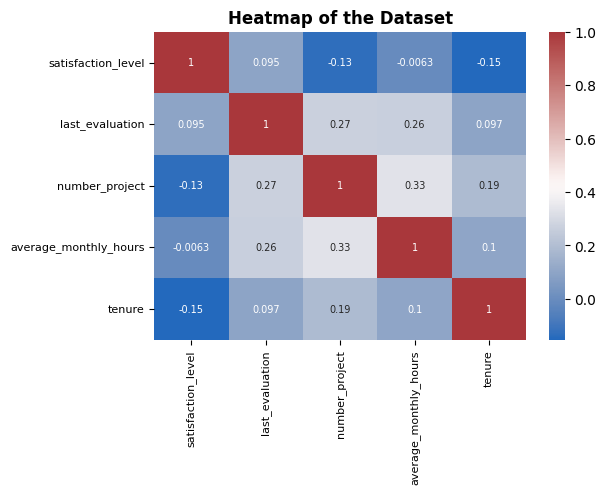

In [320]:
## Create a heatmap to visualize the correlation between variables
heatmap_corr_df_enc = df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']].corr()

plt.figure(figsize=(6,4))

sns.heatmap(heatmap_corr_df_enc, annot=True, annot_kws={'fontsize': 7}, cmap=sns.color_palette('vlag', as_cmap=True))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Heatmap of the Dataset', fontweight='bold')

plt.show()

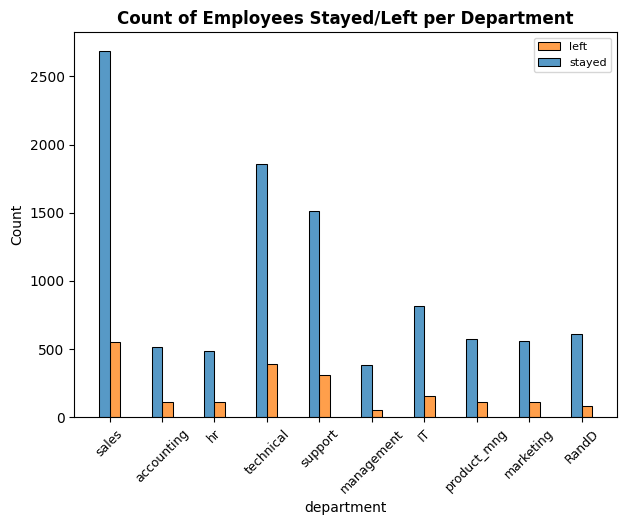

In [321]:
## Create a plot to visualize the number of employees who stayed/left per department
plt.subplots(figsize=(7,5))

sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.4)
plt.legend(labels=['left','stayed'], fontsize=8)
plt.xticks(rotation=45, fontsize=9)
plt.title('Count of Employees Stayed/Left per Department', fontweight='bold')

plt.show()

Logistic regression is sensitive to outliers. It is best to remove them before proceeding. We will the outliers from the 'tenure' column that were identified earlier.

In [322]:
## Select rows without outliers in the 'tenure' column and include them in a new dataset
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


**Isolate the Outcome Variable**

In [323]:
y = df_logreg['left']

print(y.head())

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64


**Select features to be used in the model**

In [324]:
X = df_logreg.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


**Split the data into training and testing sets**

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

**Construct a Logistic Regression Model and fit it to the training dataset**

In [326]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

**Use the Logistic Regression Model to make predictions of the test set**

In [327]:
y_pred = log_clf.predict(X_test)

**Create a Confusion Matrix**

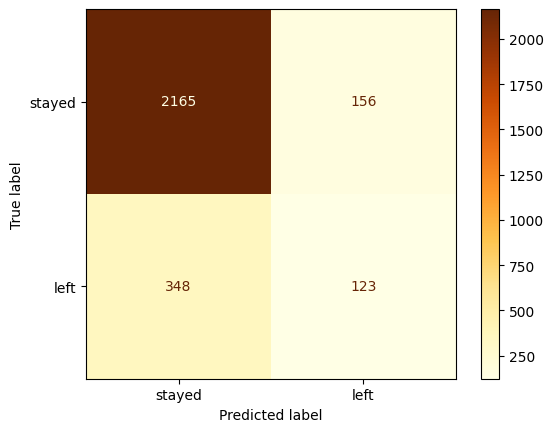

In [328]:
## Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

## Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=['stayed','left'])

## Plot confusion matrix
log_disp.plot(values_format='', cmap='YlOrBr')

plt.show()

The confusion matrix returned the following values:
- **True negatives = 2165** (employees who did not leave the company that the model accurately predicted did not leave)
- **False negatives = 348** (employees who did not leave the company but the model predicted as leaving)
- **True positives = 123** (employees who left the company that the model accurately predicted as leaving)
- **False positives = 156** (employees who left the company but the model predicted did not leave)

**Create a classification report**

In [329]:
## Check the class balance in the data
print(df_logreg['left'].value_counts(normalize=True))

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


The data is composed of approximately 83% employees who stayed and approximately 17% employees who left the company. The data is not perfectly balanced, but is not too imbalanced. We can continue evaluating the model without modifying the class balance.

In [330]:
## Create a classification report for logistic regression model
target_names = ['Predicted would not leave','Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The model values of precision, recall, and f1-score of **`0.44`, `0.26`,** and **`0.33`** respectively. These scores are significantly low.

### **Modeling Approach B: Tree-based Model**